# seaborn
- https://seaborn.pydata.org/
- statistical data visualization
- Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [1]:
# 1. 모듈 가져오기
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
sns.__version__

'0.10.1'

In [3]:
# 특정 모듈에 존재하는 모든 함수, 속성 구하기
dir(sns)

['FacetGrid',
 'JointGrid',
 'PairGrid',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_orig_rc_params',
 'algorithms',
 'axes_style',
 'axisgrid',
 'barplot',
 'blend_palette',
 'boxenplot',
 'boxplot',
 'categorical',
 'catplot',
 'choose_colorbrewer_palette',
 'choose_cubehelix_palette',
 'choose_dark_palette',
 'choose_diverging_palette',
 'choose_light_palette',
 'clustermap',
 'cm',
 'color_palette',
 'colors',
 'countplot',
 'crayon_palette',
 'crayons',
 'cubehelix_palette',
 'dark_palette',
 'desaturate',
 'despine',
 'distplot',
 'distributions',
 'diverging_palette',
 'dogplot',
 'external',
 'factorplot',
 'get_data_home',
 'get_dataset_names',
 'heatmap',
 'hls_palette',
 'husl_palette',
 'jointplot',
 'kdeplot',
 'light_palette',
 'lineplot',
 'lmplot',
 'load_dataset',
 'lvplot',
 'matrix',
 'miscplot',
 'mpl',
 'mpl_palette',
 'pairplot',
 'palettes',
 'palplot',
 'plottin

## 데이터로드

In [4]:
# 테스트용 데이터 로드
# 식당 내 데이터 → 손님(금연, 흡연), 요일, 점심/저녁, 식사금액, 팁, 인원, 성별 → tips
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
tips.shape

(244, 7)

In [6]:
tips['day'].unique(), tips['time'].unique()

([Sun, Sat, Thur, Fri]
 Categories (4, object): [Sun, Sat, Thur, Fri], [Dinner, Lunch]
 Categories (2, object): [Dinner, Lunch])

## 박스플롯, 스왐플롯

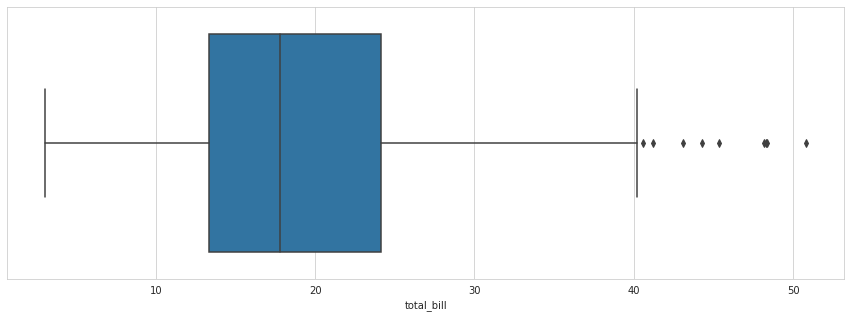

In [7]:
sns.set_style('whitegrid')
plt.figure( figsize = (15, 5) )

# 플로팅
# 대상 : total_bill(건당 총 결제비용) → 값의 분포 존재, 이상치(비싼/싼) → boxplot, 산포도(산점도, scatter)
sns.boxplot( x = tips['total_bill'] )
 
plt.show()

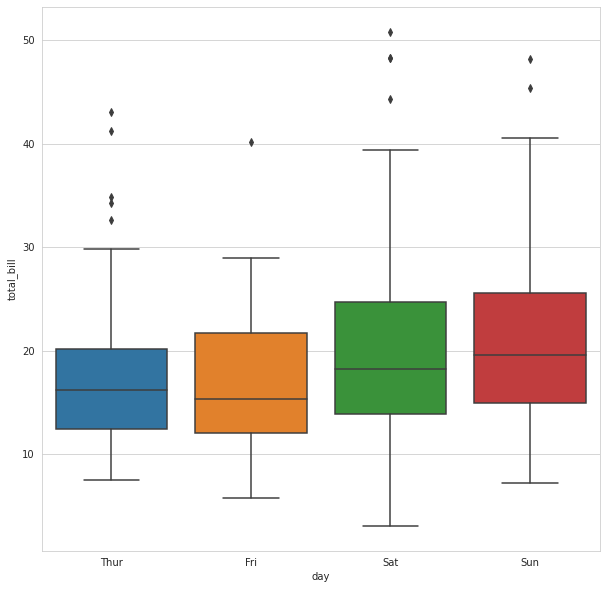

In [8]:
sns.set_style('whitegrid')
plt.figure( figsize = (10, 10) )

# 변수 2개에 대한 박스 플롯
sns.boxplot( x = 'day', y = 'total_bill', data = tips )

plt.show()

# 영업은 목금토일(주 4일)
# 일매출(결제비용, 중간값 기준)은 일요일 最高

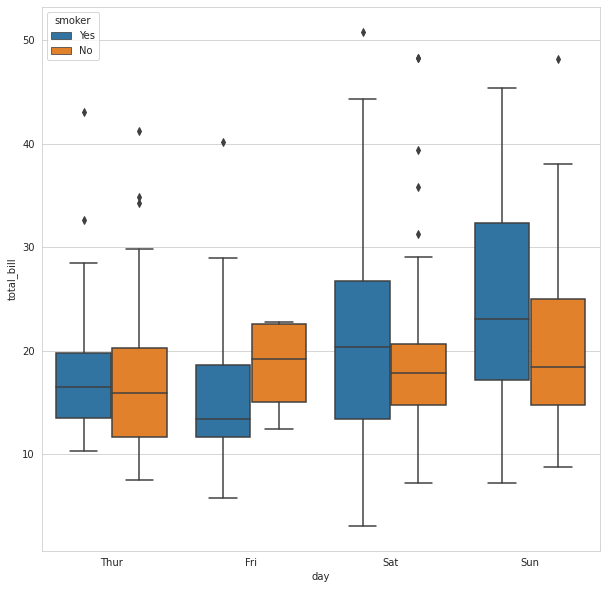

In [9]:
sns.set_style('whitegrid')
plt.figure( figsize = (10, 10) )

# 흡연 여부 구분 want
sns.boxplot( x = 'day', y = 'total_bill', hue='smoker', data = tips )

plt.show()

# 흡연자가(total_bill 중간값 기준으로) 비흡연자보다 더 많이 지불함
# 박스 크기를 보면 흡연자 고객이 더 많이 옴
# 최고 매출도 흡연자

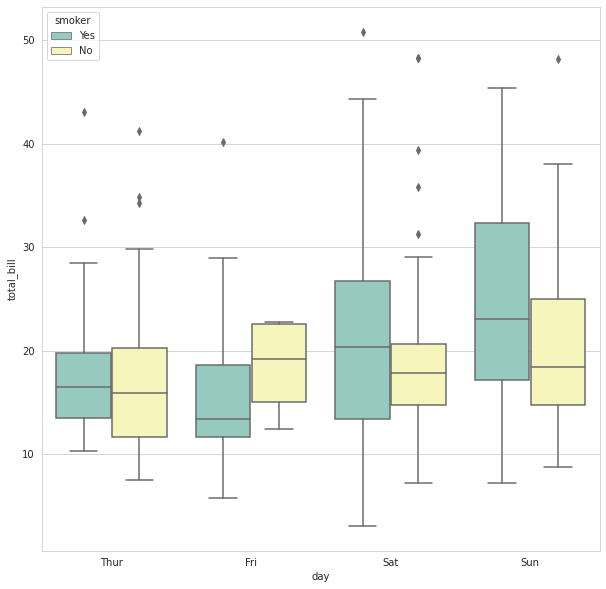

In [10]:
sns.set_style('whitegrid')
plt.figure( figsize = (10, 10) )

# 색상 조정
sns.boxplot( x = 'day', y = 'total_bill', hue='smoker', data = tips, palette='Set3' )

plt.show()

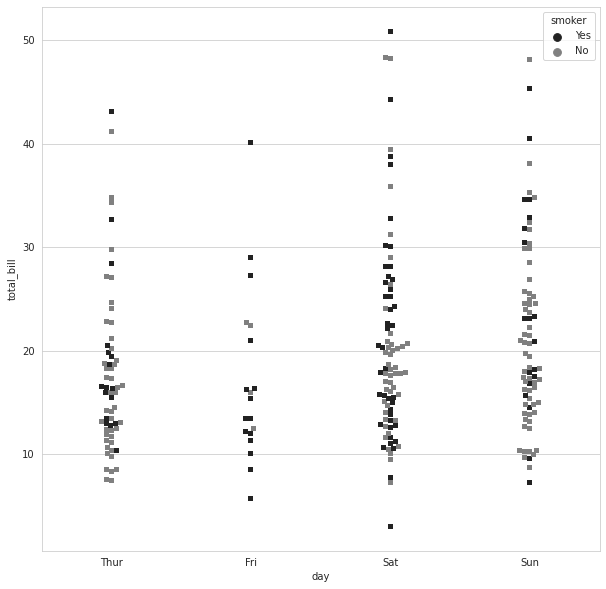

In [11]:
sns.set_style('whitegrid')
plt.figure( figsize = (10, 10) )

# 분포 → boxplot 자리에 분포(점을 찍고싶음) 표현
# color → 0.0은 블랙, 1.0은 화이트
sns.swarmplot( x = 'day', y = 'total_bill', hue='smoker', data = tips, color="0.5", marker ="s" )

plt.show()

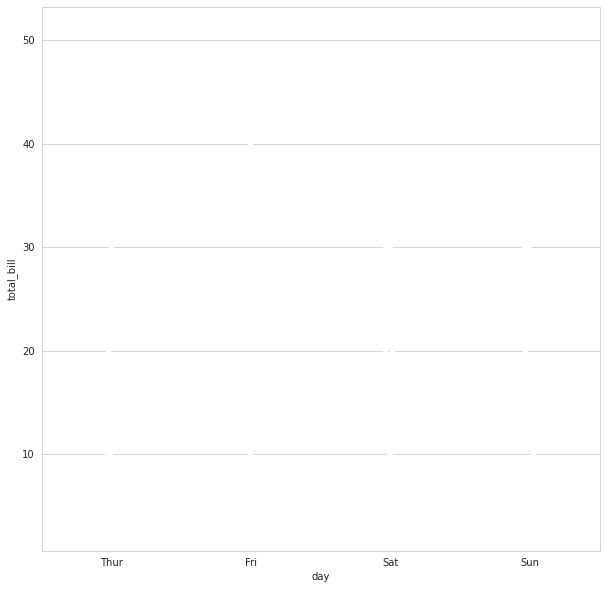

In [12]:
sns.set_style('whitegrid')
plt.figure( figsize = (10, 10) )
sns.swarmplot( x = 'day', y = 'total_bill', data = tips, color="1.0", marker ="s" )
plt.show()

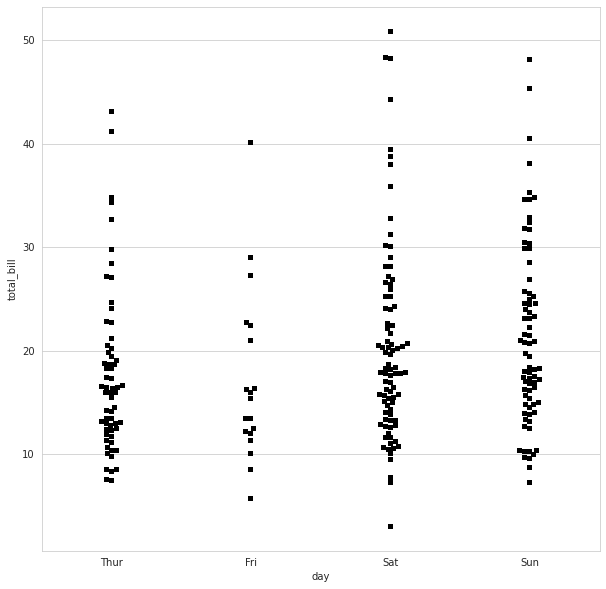

In [13]:
sns.set_style('whitegrid')
plt.figure( figsize = (10, 10) )
sns.swarmplot( x = 'day', y = 'total_bill', data = tips, color="0.0", marker ="s" )
plt.show()

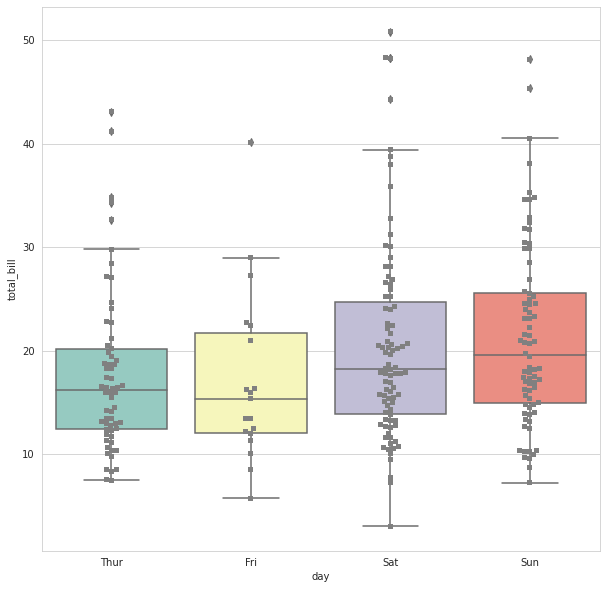

In [14]:
sns.set_style('whitegrid')
plt.figure( figsize = (10, 10) )

# 박스플롯이 구성되는 데이터의 분포를 보고 데이터가 어느쪽에 몰려있는지(기세)를 이해 可
sns.boxplot( x = 'day', y = 'total_bill', data = tips, palette='Set3' )
sns.swarmplot( x = 'day', y = 'total_bill', data = tips, color="0.5", marker ="s" )

plt.show()

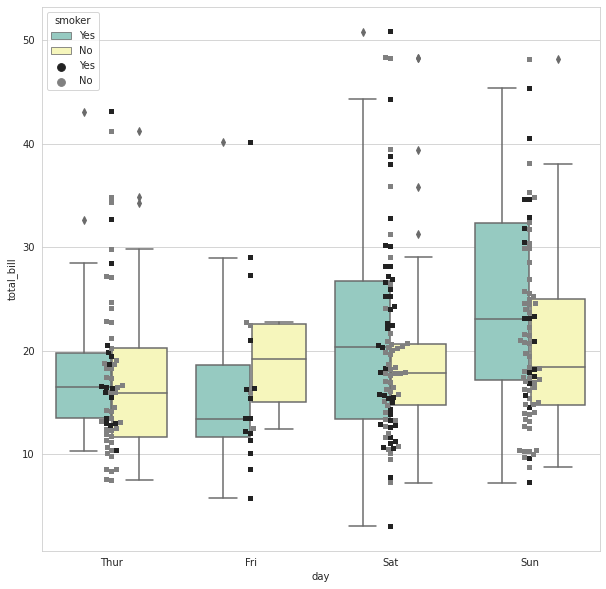

In [15]:
sns.set_style('whitegrid')
plt.figure( figsize = (10, 10) )

sns.boxplot( x = 'day', y = 'total_bill', hue='smoker', data = tips, palette='Set3' )
sns.swarmplot( x = 'day', y = 'total_bill', hue='smoker', data = tips, color="0.5", marker ="s" )

plt.show()

## 산포도(산점도)
- scatter ...
- 가로축(x), 세로축(y)를 설정한 좌표평면 상에서 관찰값을 점으로 표현하는 방식
- 회귀 분석에 중요한 시각적 자료
- 오직 2개의 변수 간의 관계를 표시(변수가 많아지면 산포행렬로)


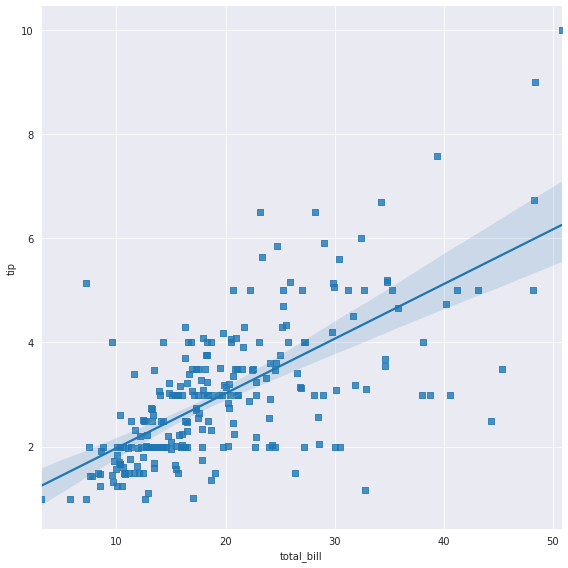

In [16]:
sns.set_style('darkgrid')
sns.lmplot( x="total_bill", y="tip", data=tips, height=8, markers="s" )
plt.show()

# 손님이 20달러를 결제하면 팁으로 3달러 기대

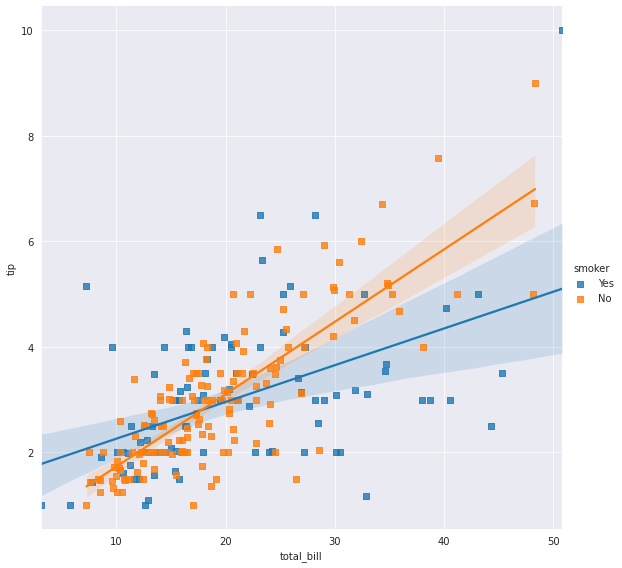

In [17]:
sns.lmplot( x="total_bill", y="tip", hue="smoker", data=tips, height=8, markers="s" )
plt.show()

# 약 18달러 이상 주문한 고객 중에 비흡연자가 팁을 더 많이 줌 
# → 비흡연자가 오면 서버는 팁을 더 받기 위해 18달러 이상의 메뉴를 추천하는 게 유리
# → 이미 고객이 메뉴를 정하고 들어왔다면 의미 없을 수 있음

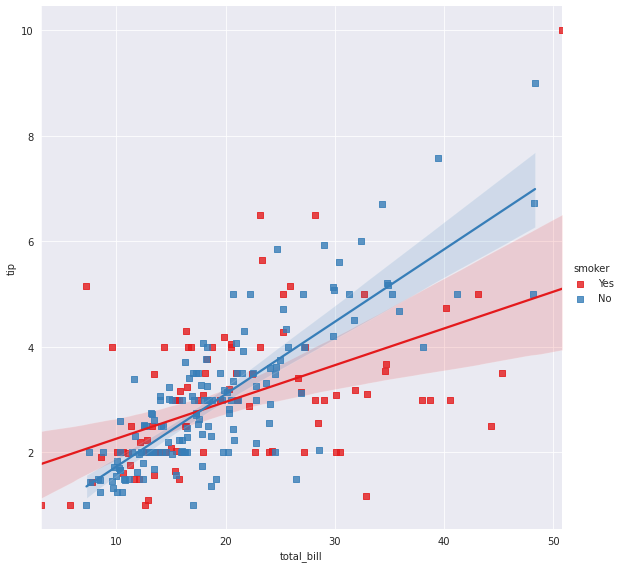

In [18]:
sns.lmplot( x="total_bill", y="tip", hue="smoker", data=tips, height=8, markers="s", palette="Set1" )
plt.show()

## 산포행렬
- 2개 이상의 변수 간의 산포도를 표현할 경우 사용
- iris(붓꽃) 데이터를 이용해 표현
- 머신러닝 지도학습의 분류 작업 시 유용하게 확인 可 (데이터 특성)

In [19]:
# 붓꽃 데이터 
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [20]:
iris.shape

(150, 5)

In [21]:
# 꽃잎과 꽃받침에 대한 가로/세로 → 길이에 대한 데이터
# 이 데이터들은 서로 영향을 받지 않는 데이터 → 독립변수(feature, 특성)

# specise : 종, 3개의 종이 값으로 존재, 앞에 독립변수 4개의 값에 의해 종이 결정됨 → 종속변수(label, class, 정답)

# 특성과 정답을 가진 데이터를 이용한 머신러닝 기법 = 지도학습

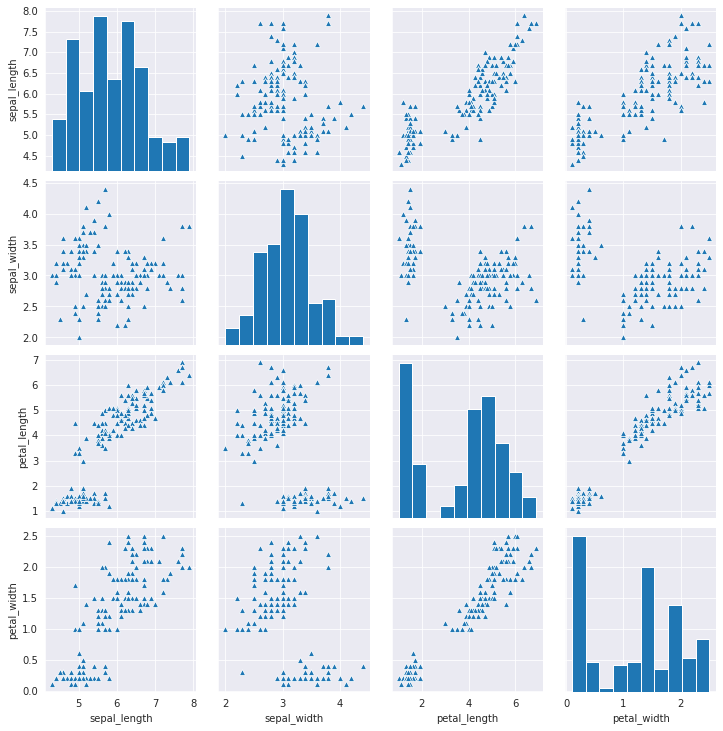

In [22]:
# 시각화
sns.pairplot(iris, markers="^")
plt.show()

# 종속변수를 분류해내기 위해서, 독립변수 간의 산포도를 보고 얼마나 잘 구분되어 있는가 or 겹치는가 확인
# 분포도 → 군집을 시각적으로 확인 可

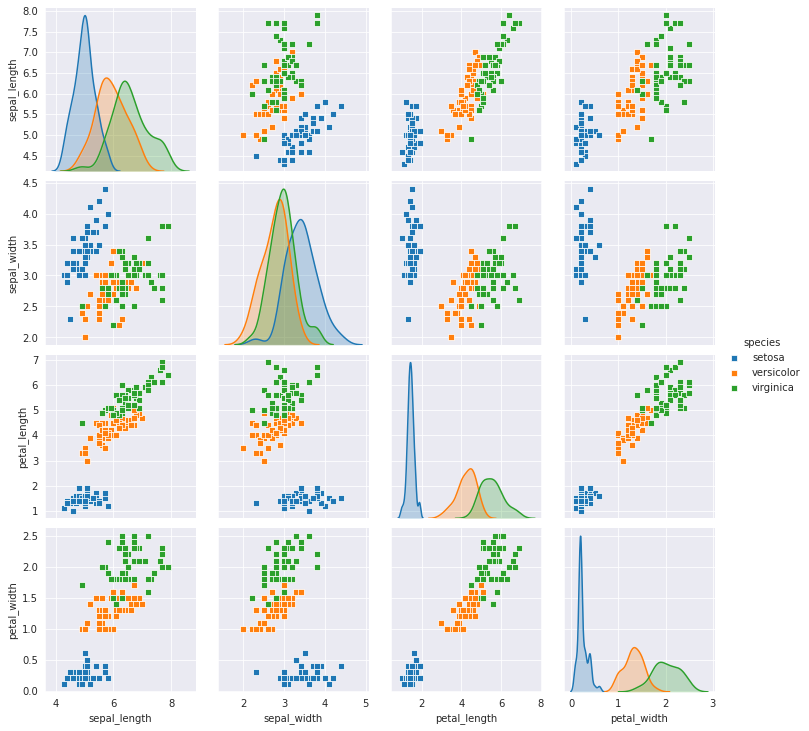

In [23]:
# 산포행렬(변수가 2개 이상)
sns.pairplot(iris, hue = 'species', markers="s")
plt.show()

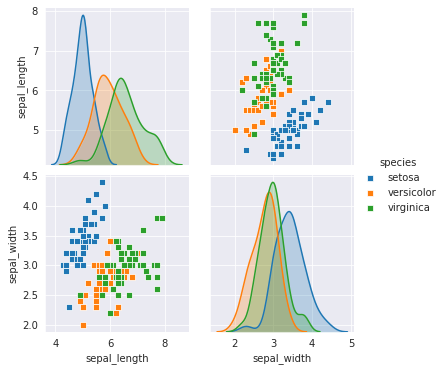

In [24]:
# 변수를 2개 지정 → 교차로 표현 → 행렬 형태, 대각선으로 반전
sns.pairplot(iris, vars=['sepal_length','sepal_width'], hue = 'species', markers="s")
plt.show()

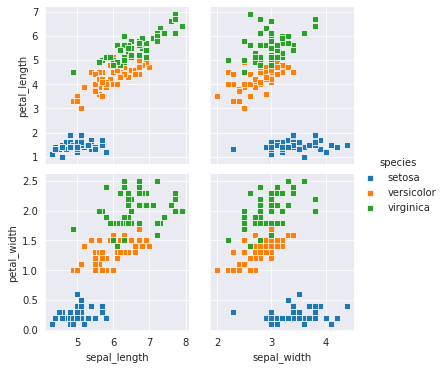

In [25]:
# 각 축의 변수 고정 → 대각선이 사라짐
sns.pairplot(iris, x_vars=['sepal_length','sepal_width'], y_vars=['petal_length','petal_width'], hue = 'species', markers="s")
plt.show()

## 히스토그램
- iris 데이터 사용
- 변수들이 얼마나 겹쳐있는지 확인, 변수들이 얼마나 구분되는지 확인

## 칼라맵
- 데이터의 밀도, 기세 등을 볼 수 O
- 어느쪽으로 치우쳐져 있는가


In [26]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [27]:
flights.tail()

,year,month,passengers
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390
143,1960,December,432


In [28]:
flights.shape

(144, 3)

In [29]:
# 인덱스에 month, 컬럼 1949-1960 배치
flights.pivot_table(index='month', columns='year')

passengers                                                       
year            1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960
month                                                                      
January          112  115  145  171  196  204  242  284  315  340  360  417
February         118  126  150  180  196  188  233  277  301  318  342  391
March            132  141  178  193  236  235  267  317  356  362  406  419
April            129  135  163  181  235  227  269  313  348  348  396  461
May              121  125  172  183  229  234  270  318  355  363  420  472
June             135  149  178  218  243  264  315  374  422  435  472  535
July             148  170  199  230  264  302  364  413  465  491  548  622
August           148  170  199  242  272  293  347  405  467  505  559  606
September        136  158  184  209  237  259  312  355  404  404  463  508
October          119  133  162  191  211  229  274  306  347  359  407  461
November         104  114  146  172  180  203  237  271  305  310  362  390
December         118  140  166  194  201  229  278  306  336  337  405  432

In [30]:
flights_pv = flights.pivot("month", "year", 'passengers')
flights_pv

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


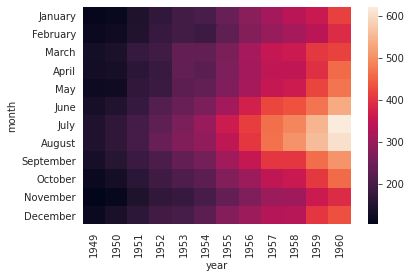

In [31]:
# 히트맵
sns.heatmap( flights_pv )

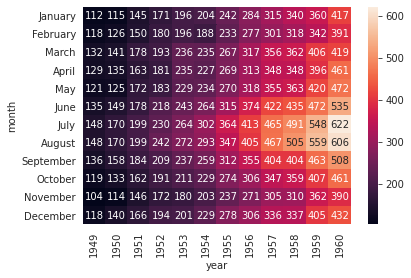

In [32]:
sns.heatmap( flights_pv, annot = True, fmt='d' )
# 히트맵 → 데이터의 추세, 밀도를 설명
# 연간 증가율, 1년 기준에서 시즌별 차지하는 비중 등을 계산해 예산/마케팅 등 어떻게 배분할 것인지 분석 可 → 매출/수익 등에 영향 O